#### 项目信息

In [ ]:
import os
import sys
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)
from get_data.get_proj_info import fetch_repo_info
from github import Github

token = ''
gh = Github(token)

paddle_info = fetch_repo_info(gh, "PaddlePaddle", "Paddle")
pytorch_info = fetch_repo_info(gh, "pytorch", "pytorch")
tensorflow_info = fetch_repo_info(gh, "tensorflow", "tensorflow")
print(paddle_info)
print(pytorch_info)
print(tensorflow_info)

['PaddlePaddle', 'Paddle', 'Organization', False, 'http://www.paddlepaddle.org/', 496028, 22781, 'C++', 5731, ['deep-learning', 'distributed-training', 'efficiency', 'machine-learning', 'neural-network', 'paddlepaddle', 'python', 'scalability'], '2016-08-15T06:59:08Z']
['pytorch', 'pytorch', 'Organization', False, 'https://pytorch.org', 1058080, 90097, 'Python', 24204, ['autograd', 'deep-learning', 'gpu', 'machine-learning', 'neural-network', 'numpy', 'python', 'tensor'], '2016-08-13T05:26:41Z']
['tensorflow', 'tensorflow', 'Organization', False, 'https://tensorflow.org', 1162158, 190019, 'C++', 74673, ['deep-learning', 'deep-neural-networks', 'distributed', 'machine-learning', 'ml', 'neural-network', 'python', 'tensorflow'], '2015-11-07T01:19:20Z']


In [ ]:
import pandas as pd
df_tf = pd.read_csv("../data/tensorflow_downstream_info.csv")
df_pytorch = pd.read_csv("../data/pytorch_downstream_info.csv")
df_paddle = pd.read_csv("../data/paddle_downstream_info.csv")

In [2]:
df_paddle = df_paddle.dropna(axis=0, how='all', subset=df_paddle.columns[2:])
df_paddle = df_paddle.reset_index(drop=True)
df_tf = df_tf.dropna(axis=0, how='all', subset=df_tf.columns[2:])
df_tf = df_tf.reset_index(drop=True)
df_pytorch = df_pytorch.dropna(axis=0, how='all', subset=df_pytorch.columns[2:])
df_pytorch = df_pytorch.reset_index(drop=True)

In [20]:
df_paddle

,owner,repo_name,owner_type,fork,homepage,size,stars_cnt,language,forks_count,topics,created_at
0,davidfrz,resume,User,False,NaN,101.0,0.0,Python,0.0,[],2025-03-17T09:50:59Z
1,000wangbo,bookedge,User,False,NaN,61675.0,0.0,Python,0.0,[],2022-05-24T12:53:35Z
2,davidhefan,PaddlePaddle_ImageProcessing,User,False,NaN,98.0,1.0,NaN,0.0,[],2021-03-12T07:26:43Z
3,007cod,yolov5_ambitious,User,False,NaN,90782.0,1.0,Python,0.0,[],2023-04-16T05:18:13Z
4,davidhefan,reofpapers,User,False,NaN,5.0,0.0,NaN,0.0,[],2021-05-21T03:51:37Z
...,...,...,...,...,...,...,...,...,...,...,...
6321,datahub-zjlab,DataProcess,User,False,NaN,15174.0,0.0,Python,0.0,[],2024-10-22T07:13:24Z
6322,datdonq,Solve_Exercises,User,False,NaN,136829.0,0.0,Python,0.0,[],2024-03-08T08:14:07Z
6323,datle56,ScanDocument,User,False,NaN,198635.0,2.0,Python,1.0,[],2024-02-23T08:12:30Z
6324,datnth1709,QAI-Hackathon-2022-SmartMenu,User,False,NaN,45349.0,0.0,Python,0.0,[],2022-08-08T16:30:20Z


#### 下游项目基本情况

In [4]:
# 下游项目基本情况
# 下游数量
print(f'downstream counts: pytorch {len(df_pytorch)}, tensorflow {len(df_tf)}, paddle {len(df_paddle)}')
# 下游非fork项目数量
print(f'downstream non-fork counts: pytorch {len(df_pytorch[df_pytorch["fork"] == False])}, tensorflow {len(df_tf[df_tf["fork"] == False])}, paddle {len(df_paddle[df_paddle["fork"] == False])}')
# 下游非fork项目占比
print(f'downstream non-fork ratio: pytorch {len(df_pytorch[df_pytorch["fork"] == False]) / len(df_pytorch)}, tensorflow {len(df_tf[df_tf["fork"] == False]) / len(df_tf)}, paddle {len(df_paddle[df_paddle["fork"] == False]) / len(df_paddle)}')
# owner type 为Organization的项目数量
print(f'downstream org proj counts: pytorch {len(df_pytorch[df_pytorch["owner_type"] == "Organization"])}, tensorflow {len(df_tf[df_tf["owner_type"] == "Organization"])}, paddle {len(df_paddle[df_paddle["owner_type"] == "Organization"])}')
# owner type 为Organization的项目占比
print(f'downstream org proj ratio: pytorch {len(df_pytorch[df_pytorch["owner_type"] == "Organization"]) / len(df_pytorch)}, tensorflow {len(df_tf[df_tf["owner_type"] == "Organization"]) / len(df_tf)}, paddle {len(df_paddle[df_paddle["owner_type"] == "Organization"]) / len(df_paddle)}')

downstream counts: pytorch 249591, tensorflow 119698, paddle 6326
downstream non-fork counts: pytorch 245485, tensorflow 118355, paddle 6080
downstream non-fork ratio: pytorch 0.9835490863051953, tensorflow 0.9887800965763839, paddle 0.9611128675308251
downstream org proj counts: pytorch 21450, tensorflow 5481, paddle 540
downstream org proj ratio: pytorch 0.08594059881966898, tensorflow 0.045790238767565036, paddle 0.0853619981030667


In [6]:
df_paddle_before = df_paddle[df_paddle['created_at'] <= '2016-08-15T06:59:08Z']
df_pytorch_before = df_pytorch[df_pytorch['created_at'] <= '2016-08-13T05:26:41Z']
df_tf_before = df_tf[df_tf['created_at'] <= '2015-11-07T01:19:20Z']
print(f'created earlier than upstream: paddle {len(df_paddle_before)}, pytorch {len(df_pytorch_before)}, tensorflow {len(df_tf_before)}')

created earlier than upstream: paddle 4, pytorch 75, tensorflow 27


In [ ]:
# # 组织
# def get_org_owner(df):
#     df_owner = df[df["owner_type"] == "Organization"].copy()
#     df_org_owner = df_owner.groupby("owner").agg({"repo_name": "count"}).sort_values(by="repo_name", ascending=False).reset_index()
#     return df_org_owner

# df_paddle_org = get_org_owner(df_paddle)
# # print(df_paddle_org)
# df_pytorch_org = get_org_owner(df_pytorch)
# # print(df_pytorch_org)
# df_tf_org = get_org_owner(df_tf)
# # print(df_tf_org)

# with open("data/paddle_org_owner.csv", "w") as f:
#     df_paddle_org.to_csv(f, index=False)
# with open("data/pytorch_org_owner.csv", "w") as f:
#     df_pytorch_org.to_csv(f, index=False)
# with open("data/tf_org_owner.csv", "w") as f:
#     df_tf_org.to_csv(f, index=False)


#### 下游项目演化历史

/tmp/ipykernel_2618401/584905058.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['quarter'] = df['created_at'].dt.to_period('Q').dt.to_timestamp()


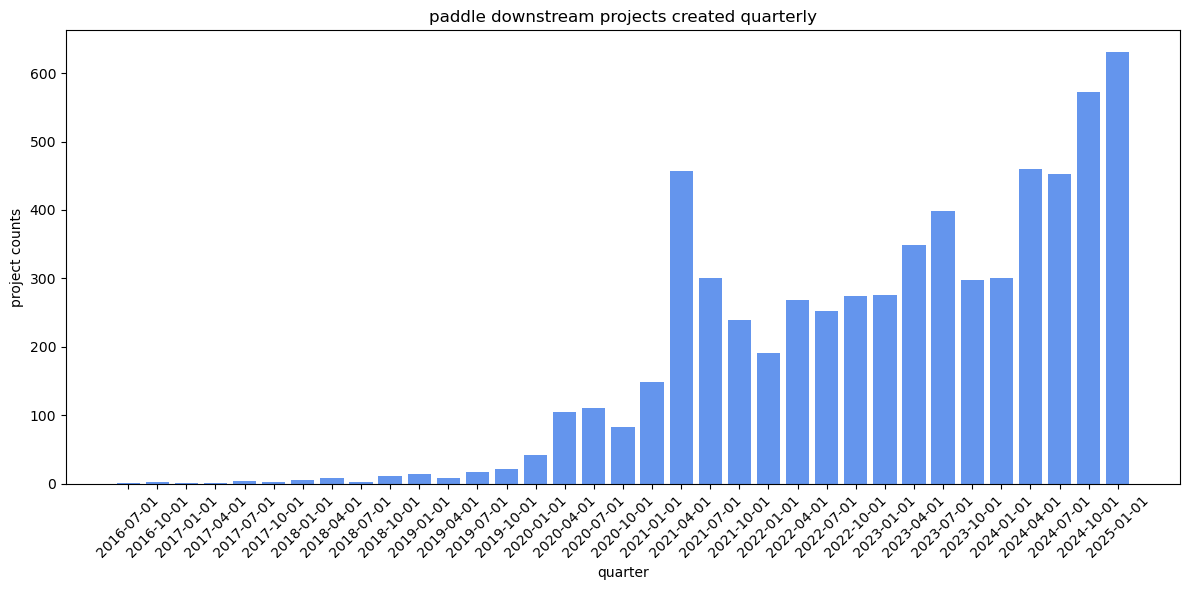

In [ ]:
import matplotlib.pyplot as plt
# 创建新列，按年月汇总
df = df_paddle.copy()
df = df[df['created_at'] >= '2016-08-15']
df = df[df['created_at'] <= '2025-03-31']
# df = df_pytorch.copy()
# df = df[df['created_at'] >= '2015-11-07']
# df = df[df['created_at'] <= '2025-03-31']
# df = df_tf.copy()
# df = df[df['created_at'] >= '2016-08-13']
# df = df[df['created_at'] <= '2025-03-31']

df['created_at'] = pd.to_datetime(df['created_at'], utc=True)

# dt.to_period('Q') 分成季度
df['quarter'] = df['created_at'].dt.to_period('Q').dt.to_timestamp()

quarterly_counts = df.groupby('quarter').size().rename("count").reset_index()


plt.figure(figsize=(12, 6))
plt.bar(quarterly_counts['quarter'].astype(str), quarterly_counts['count'], color='cornflowerblue')
plt.xlabel('quarter')
plt.ylabel('project counts')
plt.title('paddle downstream projects created quarterly')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("img/pp-downstream_history.png")
# plt.savefig("img/pytorch-downstream_history.png")
# plt.savefig("img/tf-downstream_history.png")

plt.show()

/tmp/ipykernel_2618401/2181379835.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_pytorch_2024['quarter'] = df_pytorch_2024['created_at'].dt.to_period('M').dt.to_timestamp()
/tmp/ipykernel_2618401/2181379835.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_tf_2024['quarter'] = df_tf_2024['created_at'].dt.to_period('M').dt.to_timestamp()
/tmp/ipykernel_2618401/2181379835.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_paddle_2024['quarter'] = df_paddle_2024['created_at'].dt.to_period('M').dt.to_timestamp()


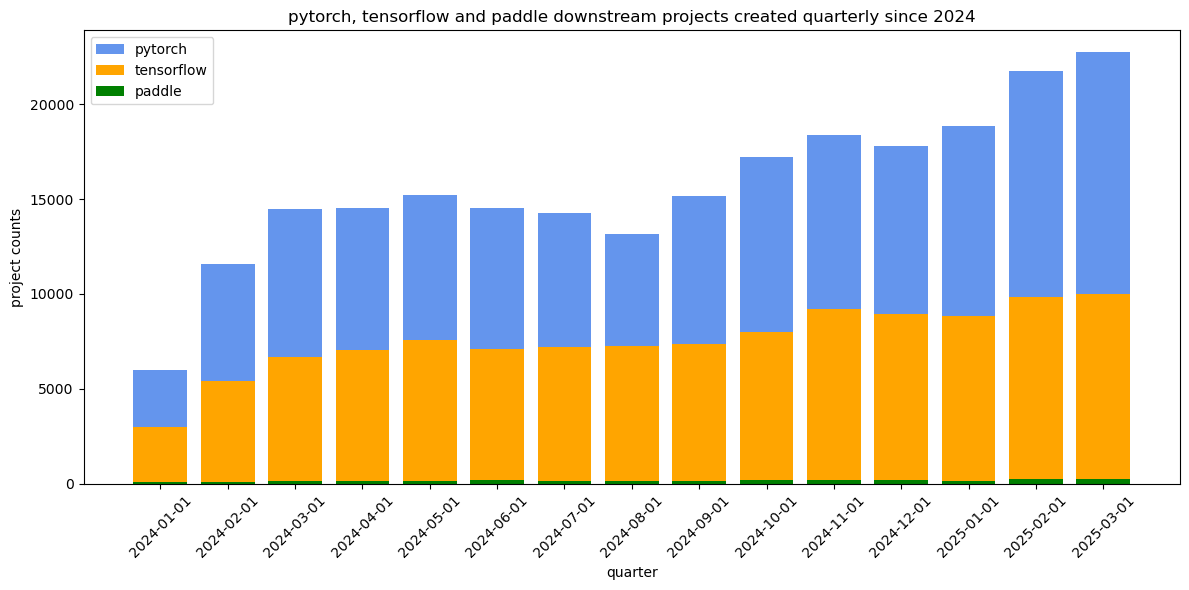

In [ ]:
#2024年以来三个项目的创建趋势
df_pytorch_2024 = df_pytorch[df_pytorch['created_at'] >= '2024-01-01']
df_pytorch_2024 = df_pytorch_2024[df_pytorch_2024['created_at'] <= '2025-03-31']
df_tf_2024 = df_tf[df_tf['created_at'] >= '2024-01-01']
df_tf_2024 = df_tf_2024[df_tf_2024['created_at'] <= '2025-03-31']
df_paddle_2024 = df_paddle[df_paddle['created_at'] >= '2024-01-01']
df_paddle_2024 = df_paddle_2024[df_paddle_2024['created_at'] <= '2025-03-31']

df_pytorch_2024['created_at'] = pd.to_datetime(df_pytorch_2024['created_at'], utc=True)
df_tf_2024['created_at'] = pd.to_datetime(df_tf_2024['created_at'], utc=True)
df_paddle_2024['created_at'] = pd.to_datetime(df_paddle_2024['created_at'], utc=True)

# dt.to_period('Q') 分成季度，然后转换为 timestamp 获取季度起始时间
df_pytorch_2024['quarter'] = df_pytorch_2024['created_at'].dt.to_period('M').dt.to_timestamp()
df_tf_2024['quarter'] = df_tf_2024['created_at'].dt.to_period('M').dt.to_timestamp()
df_paddle_2024['quarter'] = df_paddle_2024['created_at'].dt.to_period('M').dt.to_timestamp()
quarterly_counts_pytorch = df_pytorch_2024.groupby('quarter').size().rename("pytorch_count").reset_index()
quarterly_counts_tf = df_tf_2024.groupby('quarter').size().rename("tf_count").reset_index()
quarterly_counts_paddle = df_paddle_2024.groupby('quarter').size().rename("paddle_count").reset_index()

# 绘制柱状图
# 三个项目的图绘制到三个不同的图中
plt.figure(figsize=(12, 6))
plt.bar(quarterly_counts_pytorch['quarter'].astype(str), quarterly_counts_pytorch['pytorch_count'], color='cornflowerblue', label='pytorch')
plt.bar(quarterly_counts_tf['quarter'].astype(str), quarterly_counts_tf['tf_count'], color='orange', label='tensorflow')
plt.bar(quarterly_counts_paddle['quarter'].astype(str), quarterly_counts_paddle['paddle_count'], color='green', label='paddle')
plt.xlabel('quarter')
plt.ylabel('project counts')
plt.title('pytorch, tensorflow and paddle downstream projects created quarterly since 2024')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("img/downstream_history_comparison.png")
plt.show()

In [8]:
print(f'paddle 2024 downstream counts: {len(df_paddle_2024)}, ratio {len(df_paddle_2024) / 7685}')
print(f'pytorch 2024 downstream counts: {len(df_pytorch_2024)}, ratio {len(df_pytorch_2024) / 721670}')
print(f'tensorflow 2024 downstream counts: {len(df_tf_2024)}, ratio {len(df_tf_2024) / 499558}')

paddle 2024 downstream counts: 2418, ratio 0.3146389069616135
pytorch 2024 downstream counts: 235710, ratio 0.3266174290188036
tensorflow 2024 downstream counts: 113438, ratio 0.22707673583447768


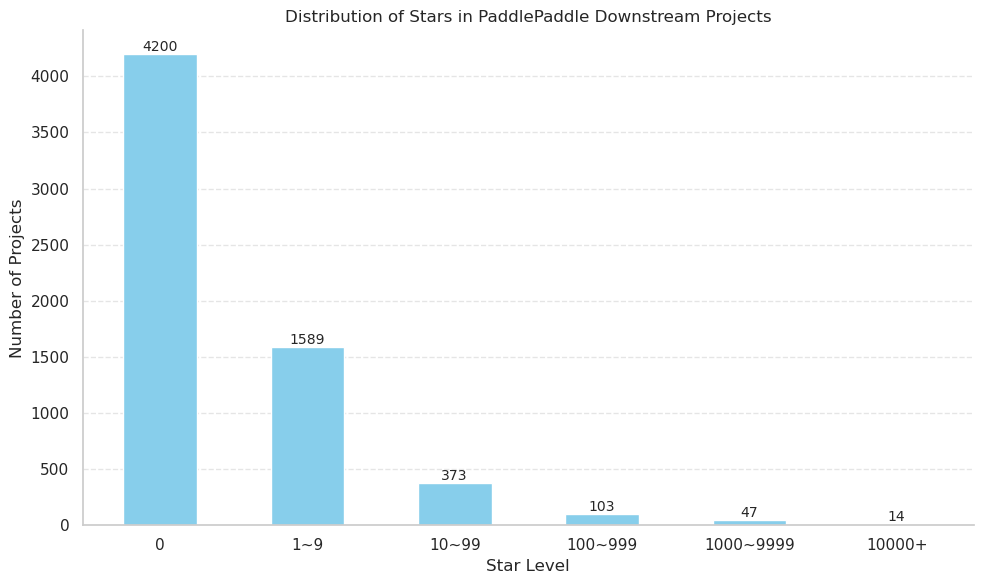

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

stars_paddle = df_paddle['stars_cnt'].values

bins = [0, 1, 10, 100, 1000, 10000, float('inf')]
labels = ['0', '1~9', '10~99', '100~999', '1000~9999', '10000+']

df_bins = pd.cut(stars_paddle, bins=bins, labels=labels, right=False)
hist = df_bins.value_counts().sort_index()

# 绘图
plt.figure(figsize=(10, 6))
plt.bar(hist.index.astype(str), hist.values, color='skyblue', width=0.5,)
plt.title('Distribution of Stars in PaddlePaddle Downstream Projects')
plt.xlabel('Star Level')
plt.ylabel('Number of Projects')
for i, v in enumerate(hist.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', visible=False)
plt.tight_layout()
plt.savefig("img/pp-downstream_stars_.png")
plt.show()

In [ ]:
# 获取star数量大于等于10000的项目
df_paddle_10000 = df_paddle[df_paddle['stars_cnt'] >= 10000]
print(f'paddle downstream projects with stars >= 10000: {len(df_paddle_10000)}')

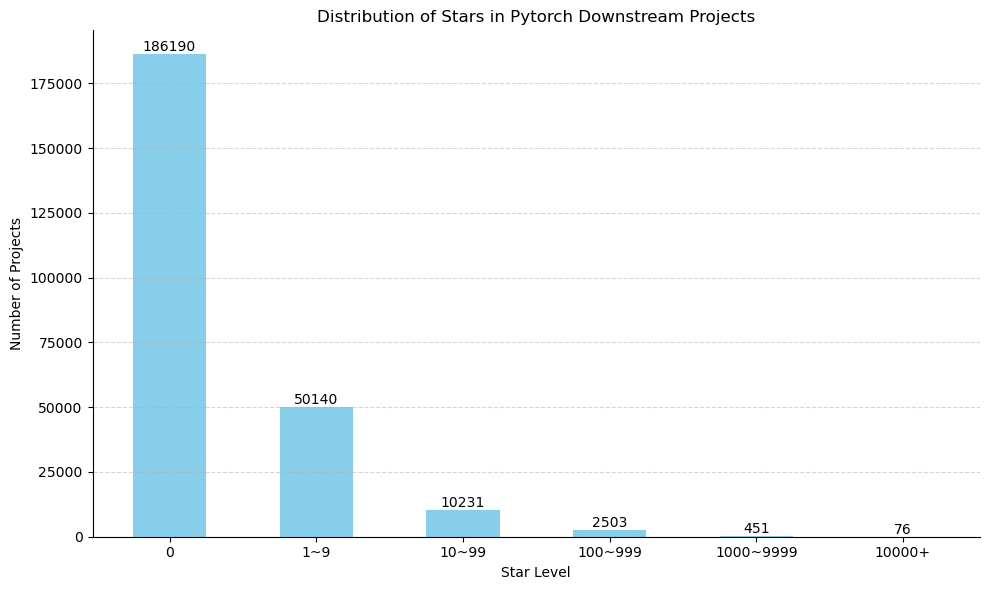

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

stars_pytorch = df_pytorch['stars_cnt'].values

bins = [0, 1, 10, 100, 1000, 10000, float('inf')]
labels = ['0', '1~9', '10~99', '100~999', '1000~9999', '10000+']

df_bins = pd.cut(stars_pytorch, bins=bins, labels=labels, right=False)
hist = df_bins.value_counts().sort_index()

# 绘图
plt.figure(figsize=(10, 6))
plt.bar(hist.index.astype(str), hist.values, color='skyblue', width=0.5,)
plt.title('Distribution of Stars in Pytorch Downstream Projects')
plt.xlabel('Star Level')
plt.ylabel('Number of Projects')
for i, v in enumerate(hist.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', visible=False)
plt.tight_layout()
plt.show()

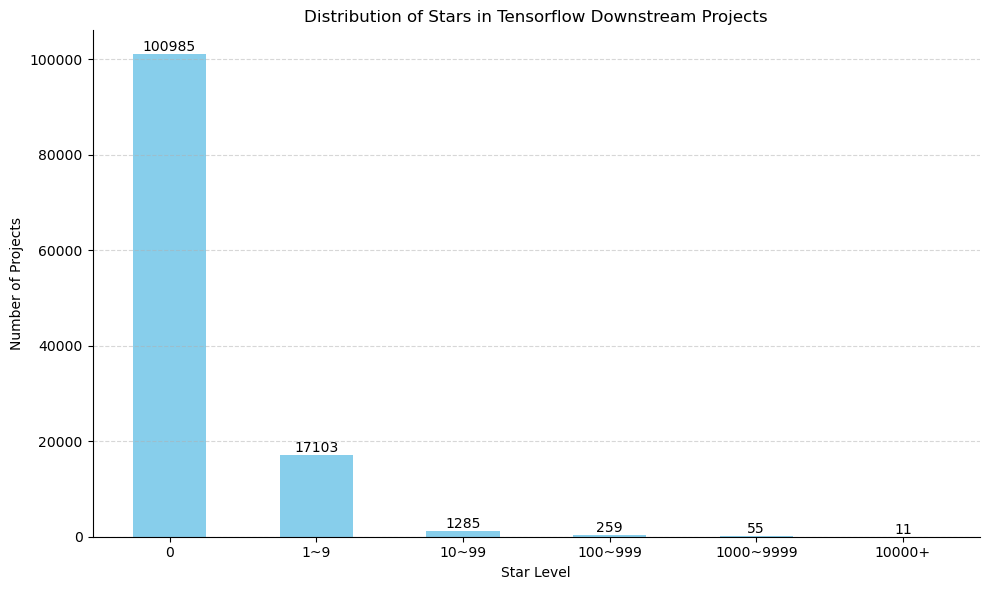

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

stars_pytorch = df_tf['stars_cnt'].values

bins = [0, 1, 10, 100, 1000, 10000, float('inf')]
labels = ['0', '1~9', '10~99', '100~999', '1000~9999', '10000+']

df_bins = pd.cut(stars_pytorch, bins=bins, labels=labels, right=False)
hist = df_bins.value_counts().sort_index()

# 绘图
plt.figure(figsize=(10, 6))
plt.bar(hist.index.astype(str), hist.values, color='skyblue', width=0.5,)
plt.title('Distribution of Stars in Tensorflow Downstream Projects')
plt.xlabel('Star Level')
plt.ylabel('Number of Projects')
for i, v in enumerate(hist.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', visible=False)
plt.tight_layout()
plt.show()

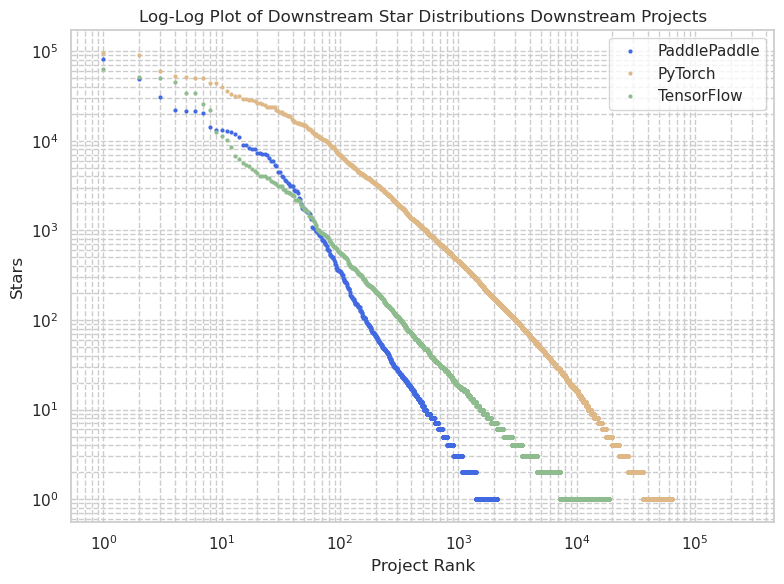

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

stars_paddle = np.sort(df_paddle['stars_cnt'].dropna().values)[::-1]
stars_pytorch = np.sort(df_pytorch['stars_cnt'].dropna().values)[::-1]
stars_tf = np.sort(df_tf['stars_cnt'].dropna().values)[::-1]

ranks_paddle = np.arange(1, len(stars_paddle) + 1)
ranks_pytorch = np.arange(1, len(stars_pytorch) + 1)
ranks_tf = np.arange(1, len(stars_tf) + 1)

plt.figure(figsize=(8, 6))
plt.loglog(ranks_paddle, stars_paddle, label='PaddlePaddle', marker='o', linestyle='none', markersize=2,color="#4169E1")
plt.loglog(ranks_pytorch, stars_pytorch, label='PyTorch', marker='o', linestyle='none', markersize=2,color='#DEB887')
plt.loglog(ranks_tf, stars_tf, label='TensorFlow', marker='o', linestyle='none', markersize=2,color='#8FBC8F')

# 添加幂律参考直线（在 log-log 中直线斜率为 -k）
# ref_x = np.logspace(0, 5)  # 定义横轴区间
# k_values = [-1, -1.2]
# colors = ['gray','gray']
# linestyles = [':', '-.']

# for k, c, style in zip(k_values, colors, linestyles):
#     ref_y = 1e5 * ref_x**k  # 选择一个参考起点（1e5 可以换成你真实数据的最大 star）
#     plt.loglog(ref_x, ref_y, linestyle=style, color=c, label=f'k = {k}')

plt.xlabel('Project Rank')
plt.ylabel('Stars')
plt.title('Log-Log Plot of Downstream Star Distributions Downstream Projects')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.savefig("img/downstream_stars_comparison.png")
plt.show()

In [4]:
paddle_star_over100 = df_paddle[df_paddle['stars_cnt'] >= 100]
pytorch_star_over100 = df_pytorch[df_pytorch['stars_cnt'] >= 100]
tf_star_over100 = df_tf[df_tf['stars_cnt'] >= 100]

# star数量大于100的项目数量和比例
print(f'paddle downstream projects with >=100 stars: {len(paddle_star_over100)}, {len(paddle_star_over100) / len(df_paddle)}')
print(f'pytorch downstream projects with >=100 stars: {len(pytorch_star_over100)}, {len(pytorch_star_over100) / len(df_pytorch)}')
print(f'tf downstream projects with >=100 stars: {len(tf_star_over100)}, {len(tf_star_over100) / len(df_tf)}')

paddle downstream projects with >=100 stars: 164, 0.02592475497944989
pytorch downstream projects with >=100 stars: 3030, 0.012139860812288905
tf downstream projects with >=100 stars: 325, 0.0027151665023642836
